<a href="https://colab.research.google.com/github/AleksandraJuras2000/Kurs_Udemi/blob/main/06_uczenie_maszynowe/03_metryki_regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [6]:
y_true = 100 + 20 * np.random.randn(50)
y_true

array([ 73.99240281,  69.81929773, 134.61142511,  72.2421837 ,
       104.02239361,  39.94549706,  83.54289309,  95.16535772,
        86.31949308,  90.0511885 , 113.68131904, 146.63468263,
       133.33932281, 114.8053747 ,  71.8156199 , 120.07541817,
        75.51221859,  61.31251171, 108.41492685,  76.99245299,
        98.5077538 , 102.36154768,  99.19923833,  98.601238  ,
        74.79008226, 101.8626164 ,  99.11311944,  86.3730434 ,
       123.73061421, 103.99487743,  89.56909516,  80.37033435,
       121.05525439,  97.98974721,  97.89796959,  91.12378076,
       103.46114411,  77.00001622,  87.14257397,  87.61075291,
       118.04996874, 105.92185392,  78.25854337,  51.04060747,
        79.73459163, 105.11526245, 110.94510576, 107.31087819,
       110.58497297,  93.29191779])

In [7]:
y_pred = y_true + 10 * np.random.randn(50)
y_pred

array([ 78.86388735,  60.30758327, 128.53386503,  62.12556845,
       119.01669827,  27.25371474,  75.54562066,  94.02749858,
        78.54527333,  81.56254453, 105.4887102 , 123.08095653,
       139.69106673, 112.69394247,  61.38221591, 128.92440941,
        85.42347236,  63.10980206, 102.72230071,  61.85470539,
       112.23263645,  97.19972169, 117.17158253, 108.67764704,
        70.17843173, 105.77416581,  90.76207095, 102.73431757,
       103.28562099, 114.06139389,  99.17713168,  69.20958894,
       129.97800373, 101.13295882,  88.85974894,  87.48291131,
       105.69475004,  72.53010167, 104.46112573,  87.37168409,
       118.83790666, 105.78183623,  80.9142304 ,  74.67022136,
        83.28448128, 107.38624236, 125.15556304, 111.99329769,
        91.07228094,  78.78298632])

In [8]:
results = pd.DataFrame({"y_true": y_true, "y_pred": y_pred})
results.head()

,y_true,y_pred
0,73.992403,78.863887
1,69.819298,60.307583
2,134.611425,128.533865
3,72.242184,62.125568
4,104.022394,119.016698


In [10]:
results['error'] = results['y_true'] - results['y_pred']
results.head()

,y_true,y_pred,error
0,73.992403,78.863887,-4.871485
1,69.819298,60.307583,9.511714
2,134.611425,128.533865,6.077560
3,72.242184,62.125568,10.116615
4,104.022394,119.016698,-14.994305


## Iterpretacja graficzna

In [11]:
def plot_regression_results(y_true, y_pred):
    results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    min = results[['y_true', 'y_pred']].min().min()
    max = results[['y_true', 'y_pred']].max().max()

    fig = go.Figure(data=[go.Scatter(x=results['y_true'], y=results['y_pred'], mode='markers'),
                    go.Scatter(x=[min, max], y=[min, max])],
                    layout=go.Layout(showlegend=False, width=800, height=500,
                                     xaxis_title='y_true',
                                     yaxis_title='y_pred',
                                     title='Regression results'))
    fig.show()
plot_regression_results(y_true, y_pred)

# idealnie byłoby gyby wszytkie kropki lezały na czerwonej lini, byłby to model idalny. im bardziej rozproszone są punkty tym gorszy jest nasz model

In [19]:
results[['y_true', 'y_pred']].min()

,0
y_true,38.035725
y_pred,25.974794


In [12]:
y_true = 100 + 20 * np.random.randn(1000)
y_pred = y_true + 10 * np.random.randn(1000)
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results['error'] = results['y_true'] - results['y_pred']

px.histogram(results, x='error', nbins=50, width=800)

## MEAN ABSOLUTE ERROR - ŚREDNI BŁĄD BEZWZGLĘDNY

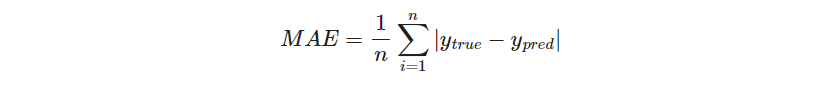

In [20]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

mean_absolute_error(y_true, y_pred)

8.078495207186116

In [21]:
from sklearn.metrics import mean_absolute_error  # tutaj mamy tą metrykę zaimplementowaną
mean_absolute_error(y_true, y_pred)

8.078495207186116

## MEAN SQUARED ERROR - BŁĄD ŚREDNIOKWADRATOWY
- WIĘKSZE ODLEGŁOŚĆI SĄ BARDZIEJ KARANE


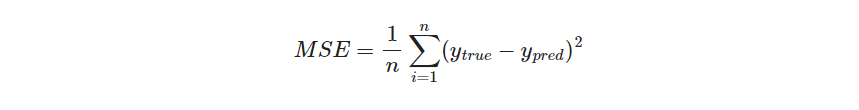

In [25]:
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum()/len(y_true)

mean_squared_error(y_true, y_pred)

105.24697021694219

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

105.24697021694219

## ROOT MEAN SQUARED ERROR - PIERWIASTEK BŁĘDU ŚREDNIOKWADRATOWEGO
- JAK ŚREDNIO NASZE PREDYKCJE ODBIEGAJA OD WARTOŚCI PRAWDZIWYCH

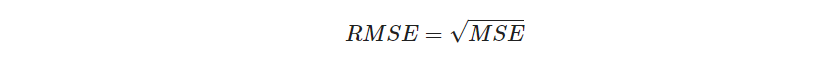

In [27]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(((y_true - y_pred)**2).sum() / len(y_true))

root_mean_squared_error(y_true, y_pred)

10.258994600687837

In [28]:
np.sqrt(mean_squared_error(y_true, y_pred))

10.258994600687837

## BŁĄD MAKSYMALNY

In [29]:
def max_error(y_true, y_pred):
    return abs(y_true - y_pred).max()

max_error(y_true, y_pred)  # jest to najwiekszy błąd naszego modelu

40.6141364390982

In [31]:
max_error(y_true, y_pred)

40.6141364390982

In [32]:
from sklearn.metrics import max_error
max_error(y_true, y_pred)

40.6141364390982

## R2 SCORE - WSPÓŁCZYNNIK DETERMINACJI

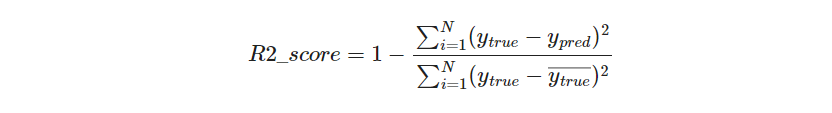

In [34]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred) # chcemy aby ta metryka była jak najbliżej jedynki

0.7303354727572827

In [35]:
def r2_score(y_true, y_pred):
  numerator = ((y_true -y_pred)**2).sum()
  denominator = ((y_true - y_true.mean())**2).sum()
  try:
    r2 = 1 - (numerator/denominator)
  except ZeroDivisionError:
    print('Dzielenie przez zero')
  return r2

In [36]:
r2_score(y_true, y_pred)

0.7303354727572827